**import** **libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load** **dataset**

In [53]:
df = pd.read_csv("student_info.csv")

In [54]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [55]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [56]:
df.shape

(200, 2)

**Discover and visualize the data to gain insights**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [58]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


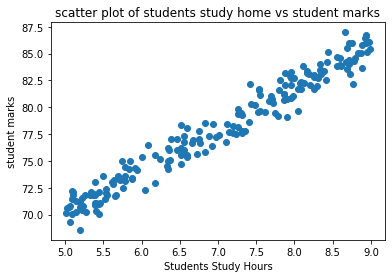

In [59]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("student marks")
plt.title("scatter plot of students study home vs student marks")
plt.show()

**prepare the data for machine learning algorithms**

In [60]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [61]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [62]:
df2 = df.fillna(df.mean())

In [63]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [64]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [65]:
x = df2.drop("student_marks", axis = 'columns')
y = df2.drop("study_hours", axis = "columns")
print("shape of x = ", x.shape)
print("shape of y = ", y.shape)

shape of x =  (200, 1)
shape of y =  (200, 1)


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 51)
print("shape of x_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of x_train =  (160, 1)
shape of y_train =  (160, 1)
shape of x_test =  (40, 1)
shape of y_test =  (40, 1)


**select model**

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lr.coef_

array([[3.93571802]])

In [70]:
lr.intercept_

array([50.44735504])

In [71]:
lr.predict([[4]])[0][0]

66.19022710353573

In [72]:
y_pred = lr.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

**Fine_tune your model**

In [79]:
lr.score(x_test, y_test)

0.9514124242154466

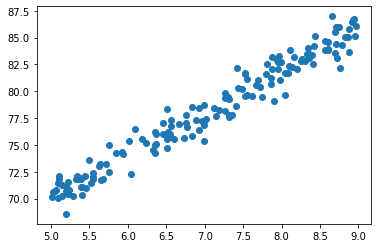

In [80]:
plt.scatter(x_train, y_train)

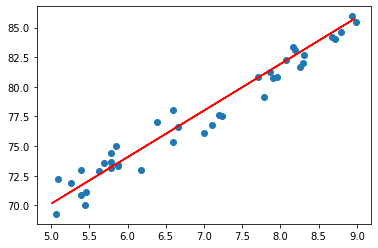

In [82]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'r')

**present your solution**

# **save ml model**

In [83]:
import joblib
joblib.dump(lr, "student_mark_predictor_model.pkl")

['student_mark_predictor_model.pkl']

In [84]:
model = joblib.load('student_mark_predictor_model.pkl')

In [85]:
model.predict([[5]])

array([[70.12594512]])